In [86]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np 

(<Figure size 2100x800 with 1 Axes>, <Axes: >)

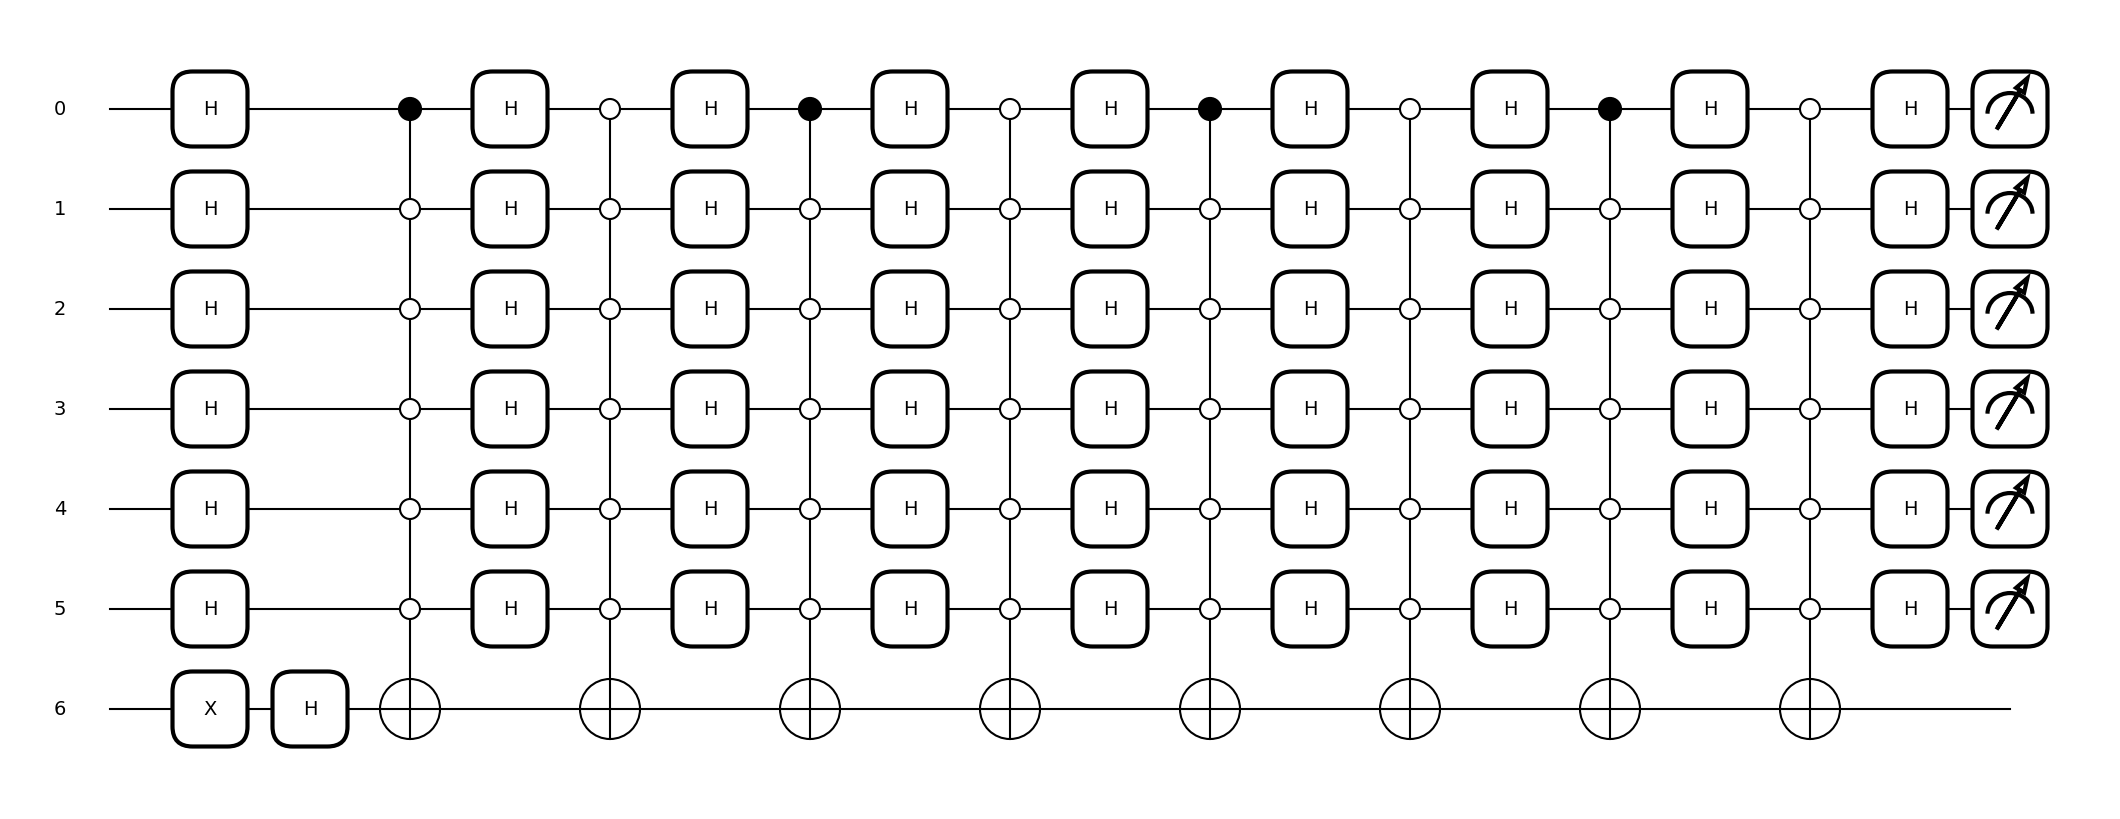

In [87]:
n_bits = 6
steps = 4
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register+aux

dev = qml.device('default.qubit', wires=n_bits+1)

def oracle(combo):
    combo_str = ''.join(str(j) for j in combo)
    qml.MultiControlledX(wires=all_wires, control_values=combo_str)

def hadamard_transform(my_wires):
    for wire in my_wires:
        qml.Hadamard(wires=wire)

def diffusion():
    hadamard_transform(query_register)
    qml.MultiControlledX(wires=all_wires, control_values="0"*n_bits)
    hadamard_transform(query_register)

@qml.qnode(dev)
def grover_circuit(combo):
    query_wires = list(range(n_bits))
    hadamard_transform(query_wires)
    qml.PauliX(n_bits)
    qml.Hadamard(n_bits)
    for i in range(steps):
        oracle(combo)
        diffusion()
              
    return qml.probs(wires=query_register)

qml.draw_mpl(grover_circuit)([1,0,0,0,0,0])

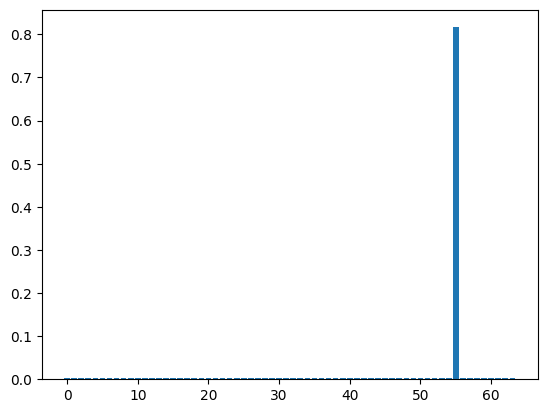

In [88]:
data = qml.QNode(grover_circuit, dev)([1,1,0,1,1,1])
data = [np.real(i) for i in data]
plt.bar(range(2**6), data)
plt.show()